In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
from pytrends.request import TrendReq
from fbprophet import Prophet
from geopy.geocoders import Nominatim
import plotly.express as px
from scipy.interpolate import interp1d
import seaborn as sns
from chart_studio import plotly
from plotly.graph_objs import *


In [2]:
 from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Googletrenwebapp")
location = geolocator.geocode('japan')
print(location.latitude , location.longitude)

36.5748441 139.2394179


In [56]:
for i in range(4):
    lpo = []
    lpo.append(str(i))
print(lpo)

['3']


In [66]:
lemon = []
for a in countries.keys():
    lemon.append(a)
print(lemon)


['Finland', 'Netherlands', 'Ireland', 'Sweden', 'Germany', 'Denmark', 'Switzerland', 'Norway', 'France', 'Spain', 'Canada', 'Bulgaria', 'Belgium', 'Estonia', 'United Kingdom', 'Luxembourg', 'Russia', 'New Zealand', 'Austria', 'Italy', 'Australia', 'Latvia', 'Cyprus', 'Singapore', 'United States', 'Japan', 'North Macedonia', 'South Korea', 'Moldova', 'Slovakia', 'Romania', 'Portugal', 'Malaysia', 'China', 'Poland', 'Philippines']


In [7]:
def splitter(userinput):
    product = userinput.split(' ')
    return str(product)
user = splitter('dota')
kw = []
kw.append(user)

print(kw)

["['dota']"]


In [2]:
countries = {
        'Worldwide' : '',
        'Finland' : 'FI',
        'Netherlands' : 'NL',
        'Sweden'  : 'SE',
        'Germany' : 'DE',
        'Denmark' : 'DK',
        'Switzerland' : 'CH',
        'Norway'  : 'NO',
        'France'  : 'FR',
        'Spain'   : 'ES',
        'Canada'  : 'CA',
        'Bulgaria' : 'BG',
        'Belgium' : 'BG',
        'Estonia' : 'EE',
        'United Kingdom' : 'GB',
        'Luxembourg' : 'LU',
        'Russia'  : 'RU',
        'New Zealand' : 'NZ',
        'Austria' : 'AT',
        'Italy'   : 'IT',
        'Australia' : 'AU',
        'Latvia'  : 'LV',
        'Cyprus'  : 'CY',
        'Singapore' : 'SG',
        'United States' : 'US',
        'Japan'   : 'JP',
        'North Macedonia' : 'MK',
        'South Korea'  : 'KR',
        'Moldova' : 'MD',
        'Slovakia' : 'SK',
        'Romania' : 'RO',
        'Portugal' : 'PT',
        'Malaysia' : 'MY',
        'China' : 'CN',
        'Poland'   : 'PL',
        'Philippines' : 'PH',
}

typeSearch = {
    'Google Search' : '',
    'YouTube Search' : 'youtube'
}

len(countries)

36

In [6]:
def Interest_OT(kw_list, tl,country,types):
    ct = countries[country]
    pytrends = TrendReq(hl='en-US', tz=360 ,timeout= (10,25) )
    pytrends.build_payload( kw_list,
                         timeframe = tl, 
                         geo = ct,
                         gprop = typeSearch[types]
                         )
    data = pytrends.interest_over_time() 
    if 'isPartial' in data:
            del data['isPartial']
    if data.empty:
        return None
    else:
        return data
kw =['mr beast','pewdiepie']
df = Interest_OT(kw,'today 12-m','Philippines','YouTube Search')
df2 = []
for data in kw:
    a = data,df[data].values.mean()
    df2.append(a)
hell = pd.DataFrame(df2)
hell.set_index(0)
print(df2)
# fig = px.bar(df2, x = 0, y = 1,height=250,color = 0)
# fig.show()




[('mr beast', 12.843137254901961), ('pewdiepie', 56.490196078431374)]


## ETO NEXT TARGET

In [26]:
lhetar = []
lhetar.append('valorant')
print(lhetar[0])

valorant


In [3]:
def region_names(kw_list, tl,cot):
    list_of_kw = []
    list_of_kw.append(kw_list)
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload( list_of_kw,
                            cat = 0, 
                         timeframe = tl, 
                         geo = cot
                         )
    tr = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=False, inc_geo_code=False)
    return tr.index
def world_map(kw_list, tl,cut):
    list2_of_kw = []
    list2_of_kw.append(kw_list)
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload( list2_of_kw,
                            cat = 0, 
                         timeframe = tl, 
                         geo = cut
                         )
    tr = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=False, inc_geo_code=False)
    return tr
def related_Q(relatedkw,tl,rcountry):
    realct = countries[rcountry]
    pytrends = TrendReq(hl = 'en-US', tz = 360)
    pytrends.build_payload( relatedkw,
                            cat = 0, 
                         timeframe = tl, 
                         geo= realct
                         )
    que = pytrends.related_queries()
    return que


In [30]:
def world_map(kw_list, tl, cut,types):
    list2_of_kw = []
    list2_of_kw.append(kw_list)
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload(list2_of_kw,
                           timeframe=tl,
                           geo=cut,
                           gprop =types
                           )
    tr = pytrends.interest_by_region(
        resolution='COUNTRY', inc_low_vol=False, inc_geo_code=False)
    tr.reset_index()
    clean = tr[tr[list2_of_kw] > 0]
    return clean.dropna()
world_map('mr beast','today 5-y', 'PH', 'youtube')

,mr beast
geoName,
Bicol,65.0
Cagayan Valley,57.0
Calabarzon,68.0
Caraga,59.0
Central Luzon,64.0
Central Visayas,55.0
Cordillera Administrative Region,68.0
Davao Region,64.0
Eastern Visayas,100.0


In [6]:
def Interest_OT(kw_list, tl,country,types):
    ct = countries[country]
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload( kw_list,
                            cat = 0, 
                         timeframe = tl, 
                         geo = ct,
                         gprop= types
                         )
    data = pytrends.interest_over_time() 
    if 'isPartial' in data:
            del data['isPartial']
    que = pytrends.related_queries()
    if data.empty:
        return None
    else:
        return data

Interest_OT(['Dota'],'today 3-m','Philippines','youtube')


,Dota
date,
2021-02-18,65
2021-02-19,51
2021-02-20,66
2021-02-21,49
2021-02-22,44
...,...
2021-05-11,59
2021-05-12,55
2021-05-13,54


In [9]:
dogt = 'united states'
dogt = dogt.replace(' ','_')
dogt

'united_states'

In [7]:
Interest_OT(['Dota'],'today 3-m','Philippines','')


,Dota
date,
2021-02-18,27
2021-02-19,28
2021-02-20,40
2021-02-21,31
2021-02-22,29
...,...
2021-05-11,36
2021-05-12,51
2021-05-13,50


In [23]:
cities = region_names('Dota','today 5-y','FI')
cities

Index(['Central Finland', 'Central Ostrobothnia', 'Kainuu', 'Kymenlaakso',
       'Lapland', 'North Karelia', 'Northern Ostrobothnia', 'Northern Savonia',
       'Ostrobothnia', 'Pirkanmaa', 'Päijänne Tavastia', 'Satakunta',
       'South Karelia', 'Southern Ostrobothnia', 'Southern Savonia',
       'Southwest Finland', 'Tavastia Proper', 'Uusimaa'],
      dtype='object', name='geoName')

In [42]:
# def map_plot(kwlist,timef,ct):
cities = region_names('Python','today 5-y','FI')    #cities = region_names(kwlist,timef,ct)
lang = []
longt =  []
for i in cities:
    geolocator = Nominatim(user_agent="Googletrenwebapp")
    location = geolocator.geocode(i)
    try:
        lang.append(float(location.latitude))
        longt.append(float(location.longitude))
    except AttributeError:
        lang.append(0)
        longt.append(0)
dataf = world_map('Python','today 5-y','FI')
dataf['long'] = longt
dataf['lang'] = lang
print(dataf)

                       Python       long       lang
geoName                                            
Central Finland            66  25.579461  62.609366
Central Ostrobothnia       29  24.111411  63.647656
Kainuu                     33  28.300199  64.598731
Kymenlaakso                24  27.082884  60.731853
Lapland                    20  26.728204  67.692910
North Karelia              30  30.212604  62.801084
Northern Ostrobothnia      86  25.697052  64.952151
Northern Savonia           32   0.000000   0.000000
Ostrobothnia               47  21.209937  62.965186
Pirkanmaa                  84  23.715711  61.717433
Päijänne Tavastia          31  25.687187  61.144426
Satakunta                  27  21.782451  61.593428
South Karelia              64  28.405513  61.266714
Southern Ostrobothnia      24   0.000000   0.000000
Southern Savonia           26   0.000000   0.000000
Southwest Finland          60  22.414426  60.305948
Tavastia Proper            32   4.369129  50.843746
Uusimaa     

In [10]:
def map_plot(kwlist,timef,ct):
    for i in kwlist:
        cities = region_names(i,timef,ct)
        lang = []
        longt =  []
        for rg in cities:
            geolocator = Nominatim(user_agent="Googletrenwebapp")
            location = geolocator.geocode(rg)
            lang.append(location.latitude)
            longt.append(location.longitude)
        dataf = world_map(i,timef,ct)
        dataf['long'] = longt
        dataf['lang'] = lang
        fdata_f = dataf.reset_index()  
        list1 = fdata_f[i].values.tolist()
        m = interp1d([min(list1),max(list1)],[10,20])
        cr = m(list1)
        zoo = 0 if ct == '' else 4
        fig = px.density_mapbox(fdata_f,lat = 'lang',lon = 'long',radius=cr,zoom= zoo ,mapbox_style='open-street-map')
        fig.show()
map_plot(['Hotdog'],'today 3-m','')

ValueError: A value in x_new is below the interpolation range.

In [6]:
def trendingsearch(tcountry):
    pytrends = TrendReq(hl='en-US', tz=360)
    tcountry = tcountry.replace(' ','_')
    trends = pytrends.trending_searches(pn=tcountry)
    return trends.loc[:9]
trendingsearch('japan')

,0
0,BTS Butter
1,B'z
2,アラジン
3,JR西日本
4,どん兵衛
5,広島カープ
6,全米プロゴルフ選手権
7,小沢健二
8,新田真剣佑
9,緊急事態宣言 大阪


In [4]:
def topcharts(loc,year):
    ct = ''
    pytrends = TrendReq(hl = 'en-US', tz = 360)
    charts = pytrends.top_charts(year, hl='en-US', tz=300, geo=loc)
    if charts.empty:
        return None
    else:
        return charts.values
topcharts('GLOBAL','2020')

array([['Coronavirus', ''],
       ['Election results', ''],
       ['Kobe Bryant', ''],
       ['Zoom', ''],
       ['IPL', ''],
       ['India vs New Zealand', ''],
       ['Coronavirus update', ''],
       ['Coronavirus symptoms', ''],
       ['Joe Biden', ''],
       ['Google Classroom', '']], dtype=object)

In [4]:
dataf = world_map(['Python'],'today 5-y','PH')
dataf['long'] = longt
dataf['lang'] = lang
fdata_f = dataf.reset_index()
list1 = fdata_f['Python'].values.tolist()
m = interp1d([min(list1),max(list1)],[10,20])
cr = m(list1)

print(cr)

ResponseError: The request failed: Google returned a response with code 400.

In [12]:
fig = px.density_mapbox(fdata_f,lat = 'lang',lon = 'long',radius=cr,zoom=0,mapbox_style='open-street-map')
fig.show()
# map_plot(['dota'],'today 3-m','JP')

In [22]:
fig = px.density_mapbox(fdata_f,lat = 'lang',lon = 'long',radius=cr,zoom=4,mapbox_style='open-street-map')
fig.show()

In [ ]:
pytrends.related_queries()

In [82]:
pytrends = TrendReq(hl='en-US', tz=360)
hel = pytrends.trending_searches(pn='philippines')
li = hel[0].values
samp = list(li[:9])
print(samp)

['Warriors vs Suns', 'Earthquake', 'Lakers', 'Bulls vs Nets', 'Celtics vs Heat', 'Phivolcs', 'Grizzlies vs Mavericks', 'Raptors vs Clippers', 'Hornets vs Nuggets']


In [128]:
def related_Q(relatedkw,tl,rcountry):
#     realct = countries[rcountry]
    pytrends = TrendReq(hl = 'en-US', tz = 360)
    pytrends.build_payload( relatedkw,
                            cat = 0, 
                         timeframe = tl, 
                         geo= rcountry
                         )
    que = pytrends.related_queries()
#     print(que)
    for man in que:
        sd = que[man]
        df = sd['rising']  # eto pa rin problema
        print(df.head())
#         return df.head()
related_Q(['java','python'],'today 5-y','PH')

                                 query   value
0           apk minecraft java edition  181550
1                     java edition apk  173450
2  minecraft java edition apk download  109650
3                       minecraft 1.16   55550
4                            tlauncher   54250
                    query  value
0  online python compiler  49750
1              python 3.7  27150
2    world of ball python   8900
3         boa constrictor   4300
4                 pycharm    180


In [4]:
def trendingsearch(tcountry):
    tc = tcountry.replace(' ','_')
    tct = 'philippines' if tc == 'worldwide' else tc
    pytrends = TrendReq(hl='en-US', tz=360)
    trends = pytrends.trending_searches(pn=tct)
    return trends.loc[:9]
trendingsearch('japan')

,0
0,JR西日本
1,B'z
2,全米プロゴルフ選手権
3,サッカー日本代表
4,JR
5,LGBT
6,ベルセルク
7,ルーンファクトリー5
8,かまいたち
9,オービック


In [114]:
date = 2019
pytrends = TrendReq(hl = 'en-US', tz = 360)
pytrends.top_charts(date, hl='en-US', tz=300, geo='PH')

pytrends = TrendReq(hl='en-US', tz=360)
hel = pytrends.trending_searches(pn='philippines')
li = hel[0].values
samp = list(li[:9])
print(samp)

['Warriors vs Suns', 'Earthquake', 'Bulls vs Nets', 'Celtics vs Heat', 'Phivolcs', 'Grizzlies vs Mavericks', 'Raptors vs Clippers', 'Hornets vs Nuggets', 'Earthquake now']


In [108]:
def related_Q(relatedkw,tl,rcountry):
    realct = countries[rcountry]
    pytrends = TrendReq(hl = 'en-US', tz = 360)
    pytrends.build_payload( relatedkw,
                            cat = 0, 
                         timeframe = tl, 
                         geo= realct
                         )
    que = pytrends.related_queries()
    for man in que:
        sd = que[man]
        df = sd['rising']
        return df.loc[:5]
related_Q(['dota'],'today 1-m','Japan')

AttributeError: 'NoneType' object has no attribute 'loc'

In [17]:
df = data.reset_index()
df['ds'] = df['date']
df['y'] = df['Dota']
df.drop(['Dota','date'],axis = 1,inplace = True)
df.columns = ['ds','y']
df.head()

,ds,y
0,2017-01-29,70
1,2017-02-05,67
2,2017-02-12,73
3,2017-02-19,70
4,2017-02-26,66


In [18]:
from fbprophet import Prophet
m = Prophet(interval_width = 0.95,yearly_seasonality=True)
m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-29,78.586502,63.374672,88.885496,78.586502,78.586502,-2.289655,-2.289655,-2.289655,-2.289655,-2.289655,-2.289655,0.0,0.0,0.0,76.296847
1,2017-02-05,78.127643,61.352851,86.746202,78.127643,78.127643,-3.774142,-3.774142,-3.774142,-3.774142,-3.774142,-3.774142,0.0,0.0,0.0,74.353501
2,2017-02-12,77.668785,58.690519,85.981322,77.668785,77.668785,-5.657774,-5.657774,-5.657774,-5.657774,-5.657774,-5.657774,0.0,0.0,0.0,72.011010
3,2017-02-19,77.209926,55.616696,81.376736,77.209926,77.209926,-8.053178,-8.053178,-8.053178,-8.053178,-8.053178,-8.053178,0.0,0.0,0.0,69.156747
4,2017-02-26,76.751067,53.670387,80.627731,76.751067,76.751067,-9.469759,-9.469759,-9.469759,-9.469759,-9.469759,-9.469759,0.0,0.0,0.0,67.281308


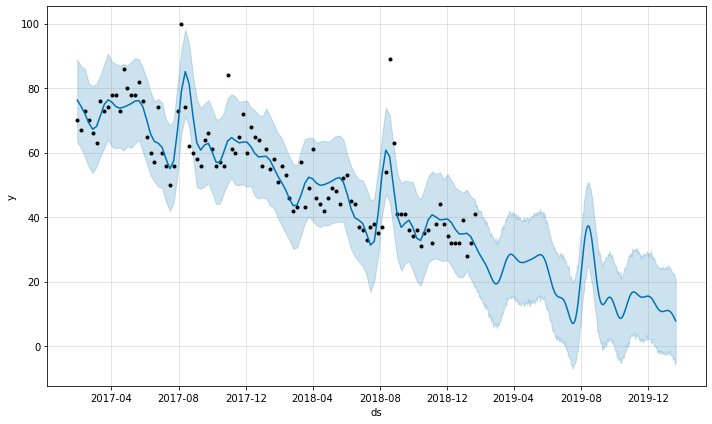

In [20]:
predict = forecast[['ds','yhat']]
pl = m.plot(forecast)

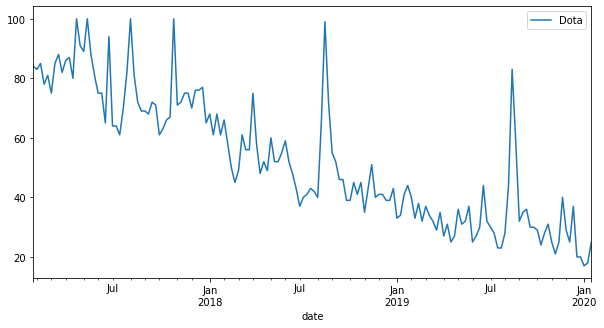

In [8]:
kw_list = ['Dota']
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload( kw_list,
                            cat=0, 
                         timeframe='2017-01-25 2020-01-25', geo='PH'
                         )
data = pytrends.interest_over_time()
del data['isPartial']
data
# data.head()
data.plot(figsize = [10,5])
plt.show()


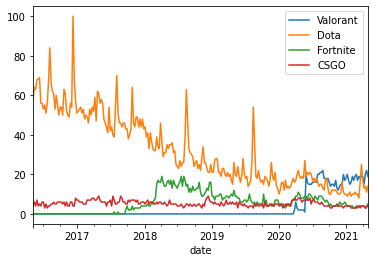

In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

def searchengine():

    pytrends = TrendReq(hl='en-US', tz=360)
    kw_list = ['Valorant','Dota','Fortnite','CSGO']
    pytrends.build_payload(kw_list,
                             cat=0, 
                             timeframe='today 5-y', 
                             geo='PH',
                             gprop='')
    data = pytrends.interest_over_time()
    # sug = pytrends.trending_searches(pn='philippines')
    # related_q = pytrends.related_queries()
    # print(related_q)
    data.plot()
    plt.show()
searchengine()


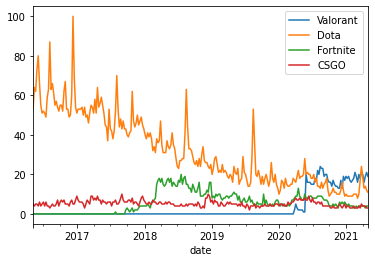

In [4]:
searchengine('PH')

In [66]:
def Interest(keyword, tl):
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload( keyword,
                            cat = 0, 
                         timeframe = tl, 
                         geo = 'AX'
                         )
    data = pytrends.interest_over_time() 
#     del data['isPartial']
    que = pytrends.related_queries()
    if data.empty:
        return None
    else:
        return data
    
def cleaning(dfname,onekw):
    df = dfname.reset_index()
    df['ds'] = df['date']
    df['y'] = df[onekw]
    df.drop([onekw,'date'],axis = 1,inplace = True)
    df.columns = ['ds','y']
    return df


In [44]:
    
putangina = Interest(['bike'], 'today 5-y')
putangina
forc = cleaning(putangina,'bike')



In [38]:
def forecast(df,time):        
    model = Prophet(interval_width = 0.95,yearly_seasonality=True)
    model.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = model.make_future_dataframe(periods=time)
    forecast = model.predict(future)
    model.plot(forecast)

In [67]:

putangina = Interest(['Python'],'today 5-y')
putangina
forc = cleaning(putangina,'Python')
forecast(forc,365)

tangina = Interest(['Vitamins'],'today 5-y')
fin =  cleaning(tangina,'Vitamins')
forecast(fin, 365)

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


TypeError: 'NoneType' object is not subscriptable

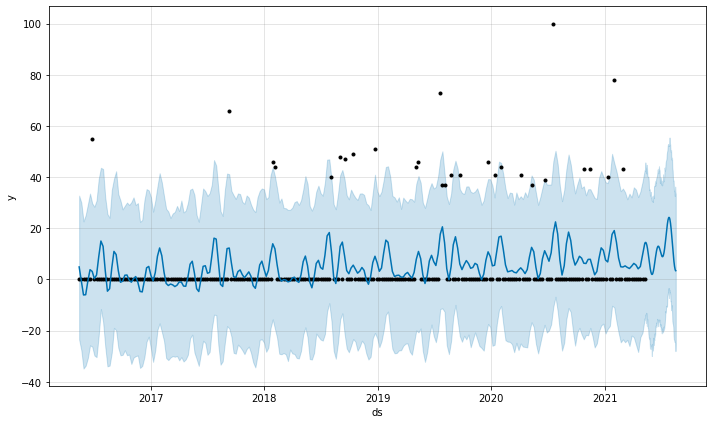

In [41]:
dfff = forecast(forc,100)

final = dfff[['ds','yhat']]
t_f =final.set_index('ds')
dfff
t_f.plot(figsize = [10,5])
plt.show()

## Tkinter Part

In [23]:
root = Tk()
root.title('Dashboard')
root.geometry('600x400')

e = Label(root, text = 'Choose a Branch')

e.grid(row = 0,column = 1,columnspan = 3)

branch = StringVar()
branch1 = StringVar()
branch2 = StringVar()
branch.set('B')
branch1.set('C')

def clicked(value):
     my_label = Label(root, text = value).grid(row = 5, column = 1)
    
def show():
    my_label = Label(root, text = var.get()).pack()

def first(val):
    return val
    print(val)

def second(val):
    return val
    
fbranchA = Radiobutton(root,text = 'Branch A', variable = branch, value = 'A', command = lambda: first(branch.get())).grid(row = 1,column = 0)
fbranchB = Radiobutton(root,text = 'Branch B', variable = branch, value = 'B', command = lambda: first(branch.get())).grid(row = 2,column = 0)
fbranchC = Radiobutton(root,text = 'Branch C', variable = branch, value = 'C', command = lambda: first(branch.get())).grid(row = 3,column = 0)

sbranchA = Radiobutton(root,text = 'Branch A', variable = branch1, value = 'A', command = lambda: second(branch.get())).grid(row = 1,column = 1)
sbranchB = Radiobutton(root,text = 'Branch B', variable = branch1, value = 'B', command = lambda: second(branch.get())).grid(row = 2,column = 1)
sbranchC = Radiobutton(root,text = 'Branch C', variable = branch1, value = 'C', command = lambda: second(branch.get())).grid(row = 3,column = 1)

my_Button = Button(root, text = 'show' , command = lambda: clicked([first(branch.get()),second(branch1.get())])).grid(row = 4,column = 1)

my_img = ImageTk.PhotoImage(Image.open("['{}', '{}']_['Cash']_Gender_customer.jpeg".format(first(branch.get()),second(branch1.get()))))
my_label = Label(image = my_img).grid(row = 6, column = 0)
# ['B', 'C']_['Cash']_Gender_customer.jpeg
root.mainloop()